In [1]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 Начнем с того, что посмотрим, какие были стоимости у билетов и какое количество пассажиров владело какими билетами. Для этого берем наш датафрейм, берем поле Fare, в котором хранится информация о стоимости, и сейчас мы воспользуемся стандартным методом библиотеки Pandas — атрибутом plot. Атрибут plot есть у колонок и у всего датафрейма. И он содержит в себе набор методов, которые позволяют вызвать ту или иную визуализацию из арсенала библиотеки matplotlib. Например, мы хотим посмотреть гистограмму распределения. Просто вызываем hist и не забываем указать директиву matplotlib inline, для того чтобы наша визуализация была отражена внутри нашего Jupyter notebook. 
 
 Больше всего купили самые дешевые билеты
 
 

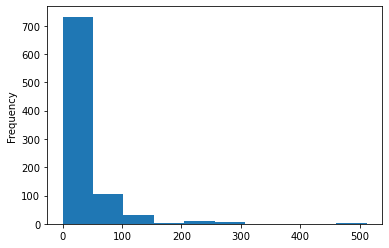

In [2]:
%matplotlib inline
df.Fare.plot.hist(bins = 10) # bins - детализация

Мы также можем воспользоваться другими методами визуализации, например, построить плотностное распределение этого значения. Для этого вызовем у атрибута plot метод kde и увидим вот такой график

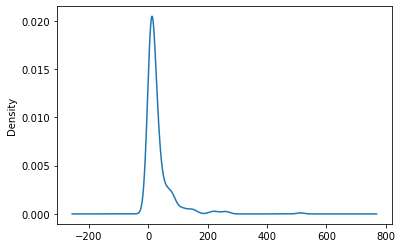

In [3]:
%matplotlib inline
df.Fare.plot.kde() # bins - детализация

 Мы можем строить распределение не какой-то одной величины, а между разными величинами. Самое простое — это такой вид распределения, это scatter plot. Для этого нам нужно вызывать метод уже не у конкретной колонки, а у всего датафрейма. Мы работали в df.plot у всего датафрейма и вызываем метод scatter. Естественно, нам нужно принять какие-то два значения x и y. В виде x мы возьмем, например, все тот же Fare, а в виде y мы возьмем факт того, выжил пассажир или нет, атрибут survived. Мы видим два распределения, которые схожи между собой, но чуть отличаются. Мы видим, что как будто бы сверху в survived чуть больше людей с большей ценой билета, а внизу, в не survived, с чуть меньшей ценой. 

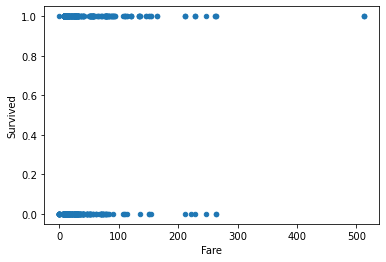

In [4]:
%matplotlib inline

df.plot.scatter(x='Fare', y='Survived')

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

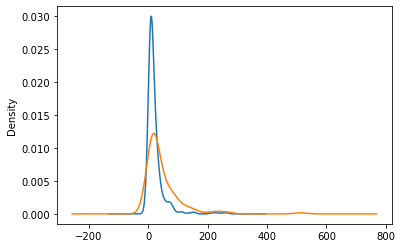

In [5]:
df.groupby('Survived').Fare.plot.kde()

Видим два графика, которые чуть отличаются. Но а) непонятно, какой из них отвечает за survived, какой — нет; и б) слишком странный масштаб, есть минусовые значения. Давайте как-то это исправим. Для этого вспоминаем, что matplotlib поддерживает два метода работы с ним. Один — это процедурный, более простой; и второй — объектно-ориентированный. Воспользуемся процедурным. 


Также давайте изменим наш диапазон значений по x. Скажем xlim, чтобы он начинался как минимум с нуля, а заканчивался, не учитывая весь огромный хвост, двумя сотнями. Что мы видим? Что распределение выживших чуть отклонено направо, то есть стоимость билетов у выживших людей была чуть выше, чем у тех, кто не выжил. И также тех, кто не выжил, в принципе было видимо было больше, они сконцентрированы в очень небольшом диапазоне, до 25 долларов. 

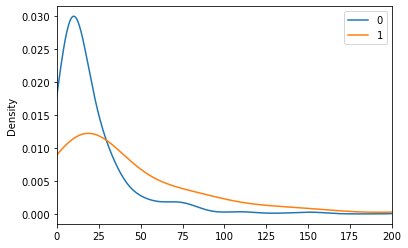

In [6]:
import matplotlib.pyplot as plt
df.groupby('Survived').Fare.plot.kde()
plt.xlim(0, 200)
plt.legend()

Давайте посмотрим, как можно работать в объектном режиме. Во-первых, мы можем видеть, что если мы вызовем какой-либо из методов атрибута plot, например, все тот же Fare.plot.hist, видим, что он возвращает нам на самом деле уже объект Axes, с которым мы уже работали. Мы можем его сохранить в переменную ax и работать с ней так, как мы уже работали с объектами matplotlib. Например, мы скажем ax.set_title('Visualization').

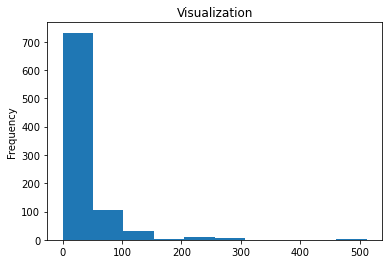

In [7]:
ax = df.Fare.plot.hist()
ax.set_title('Visualization')
ax.figure.savefig('something.png')

Что еще нам позволяет делать знание о том, что у нас есть объект ax? Оно позволяет нам нарисовать визуализации из Pandas уже какие-то другие холсты, которые могли были сделаны нами сами. Как мы это сделаем? Следующим образом. Мы берем и сами создаем наш figure и ax, как мы это делали прежде, указав метод subplot и указав размер нашего figure. И после этого мы делаем следующее. Мы когда вызываем у атрибута plot метод отрисовки чего-то, например, kde, говорим ему, на каком из Axes ему нужно рисовать. Чтобы он не рисовал где-то, где он сам решил, а мы указываем атрибут ax, который мы сами создали, и он на нем нарисует. 

1
2
3


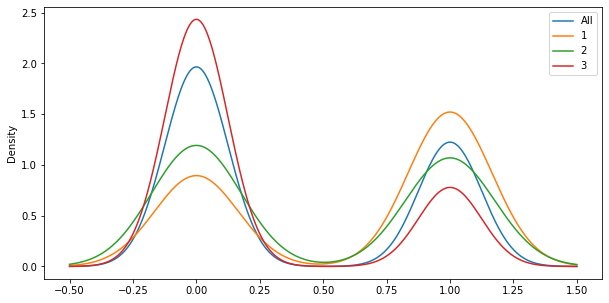

In [8]:
fig, ax = plt.subplots(figsize=(10,5))

df.Survived.plot.kde(label='All', ax=ax)
for label, class_df in df.groupby('Pclass'):
    print(label)
    class_df.Survived.plot.kde(ax=ax, label=label)
plt.legend()

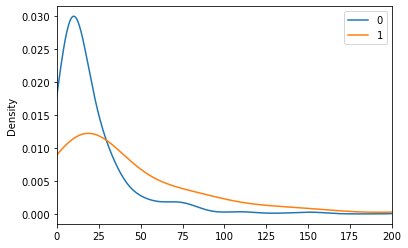

In [9]:
import matplotlib.pyplot as plt
df.groupby('Survived').Fare.plot.kde()
plt.xlim(0, 200)
plt.legend()

AttributeError: 'Series' object has no attribute 'set_title'

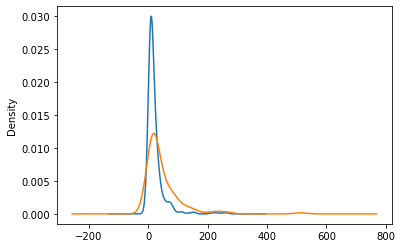

In [10]:
ax = df.groupby('Survived').Fare.plot.kde()
ax.set_title('Fare distribution')

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

df.Survived.plot.kde(label='All', ax=ax)
for label, class_df in df.groupby('Pclass'):
    print(label)
    class_df.Survived.plot.kde(ax=ax, label=label)
plt.legend()

In [ ]:
ax.figure.savefig('fare_dist.png')

In [ ]:
%matplotlib inline
df.Fare.plot.hist()

In [ ]:
import matplotlib.pyplot as plt
df.groupby('Survived').Fare.plot.kde()
plt.xlim(0, 200)
plt.legend()

Text(0.5, 1.0, 'Age distribution')

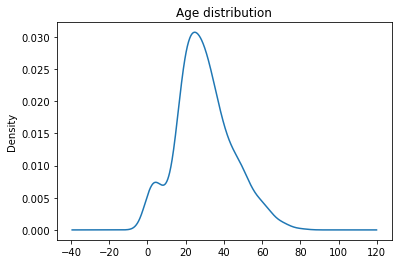

In [11]:
ax = df.Age.plot.kde()
ax.set_title('Age distribution')

In [12]:
ax.figure.savefig('Age.png')

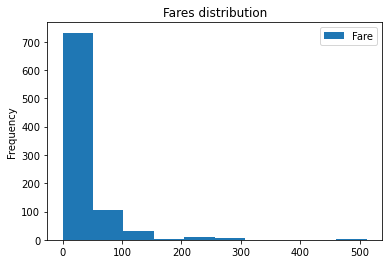

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
df.Fare.plot.hist()
plt.title('Fares distribution')
plt.legend()

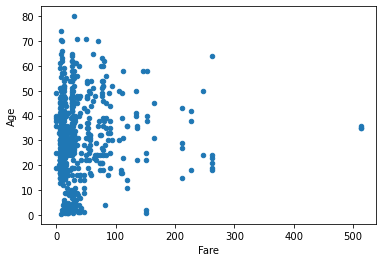

In [14]:
df.plot.scatter(x='Fare', y='Age')

In [ ]:
df.groupby('Pclass').Fare.plot.hist()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
df.Fare.plot.hist(bins=20)

In [ ]:
df.groupby('Survived').Fare.plot.hist()

In [ ]:
df.groupby('Survived').Fare.plot.hist()
plt.title('Fare distribution', fontdict={'size':20})
plt.legend()

In [ ]:
df.hist()
plt.tight_layout()

In [ ]:
axis = df.Fare.hist()
axis.set_title('I can work with axis')

In [ ]:
axis.figure.savefig('wow.png')

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
df.Survived.plot.kde(label='All', ax=ax)
for label, class_df in df.groupby('Pclass'):
    print(label)
    class_df.Survived.plot.kde(ax=ax, label=label)
plt.legend()

In [ ]:
import matplotlib.pyplot as plt
histogram_data = df.Pclass.value_counts()
values, counts = histogram_data.index, histogram_data
plt.bar(values, counts)
plt.xticks(values);